# Analisando os dados da COVID-19 no Mundo
* Esta análise foi proposta pelos alunos Gabriel Martins de Freire e Matheus Avila Abreu de Lima, alunos do Instituto de Computação da Universidade Federal do Rio de Janeiro no ano de 2024.

* A proposta é ser uma investigação, por meio de ferramentas tecnológicas, dos dados referentes à recente pandemia global de COVID 19. Aprenderemos o básico sobre datasets, tratamento de dados e plot de gráficos.

* É importante ressaltar que todos os dados que serão analisados foram extraídos do Kaggle (https://www.kaggle.com/datasets/sanaaafrine/covid-19-dataset?resource=download).

# 1. Preparando o ambiente local para a análise

A área de Ciência de Dados, a qual iremos explorar alguns conceitos na atividade de hoje, dispõe de uma ampla variedade de ferramentas para realizar essas tarefas. Uma delas são as linguagens de programação, que produzem os populares "códigos", responsáveis por todos os programas de computador e celular que você provavelmente usa no seu dia a dia. Existem muitas delas, mas hoje iremos trabalhar com a linguagem Python, uma das que são mais utilizadas em diversos campos que requerem tratamentos de dados.


## 1.1 Importando as bibliotecas necessárias

Bibliotecas são coleções de códigos que foram escritas por outros programadores anteriormente. Basicamente, nós podemos importar essas coleções e utilizar esses códigos indiretamente para realizar nossas tarefas, sem ter que reescrevê-los.

In [ ]:
# Essas hashtags fazem comentários no código. Comentários são linhas que serão ignoradas quando rodarmos o código.

# Biblioteca que oferece suporte para tratamento de dados.
import numpy as np

# Biblioteca que facilita a manipulação e análise de coleções de dados.
import pandas as pd

# Biblioteca que plota uma variedade de gráficos diferentes.
import matplotlib.pyplot as plt

## 1.2 Datasets

Dataset é uma coleção organizada de informações, geralmente estruturadas em forma de tabelas, que podem ser usadas para análise e tratamento de dados. Podem existir diversos formatos de arquivo para um dataset. Nessa atividade, usaremos um dataset originado de um csv, formato de arquivo comumente usado em planilhas de Excel.

## 1.3 Lendo nosso dataset

Para fazer a leitura do nosso arquivo, usaremos um dos pacotes importados na atividade, o Pandas.

In [ ]:
dados = pd.read_csv('covid_19.csv')
display(dados)

,country,continent,population,day,time,Cases,Recovered,Deaths,Tests
0,Saint-Helena,Africa,6115.0,2024-06-30,2024-06-30T16:15:16+00:00,2166,2.0,NaN,NaN
1,Falkland-Islands,South-America,3539.0,2024-06-30,2024-06-30T16:15:16+00:00,1930,1930.0,NaN,8632.0
2,Montserrat,North-America,4965.0,2024-06-30,2024-06-30T16:15:16+00:00,1403,1376.0,8.0,17762.0
3,Diamond-Princess,NaN,NaN,2024-06-30,2024-06-30T16:15:16+00:00,712,699.0,13.0,NaN
4,Vatican-City,Europe,799.0,2024-06-30,2024-06-30T16:15:16+00:00,29,29.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
233,Argentina,South-America,46010234.0,2024-06-30,2024-06-30T16:15:10+00:00,10128845,9997258.0,130841.0,35716069.0
234,Netherlands,Europe,17211447.0,2024-06-30,2024-06-30T16:15:10+00:00,8635786,8612599.0,22992.0,25984435.0
235,Mexico,North-America,131562772.0,2024-06-30,2024-06-30T16:15:10+00:00,7702809,6899865.0,334958.0,20013810.0
236,Iran,Asia,86022837.0,2024-06-30,2024-06-30T16:15:10+00:00,7627186,NaN,146811.0,57320267.0


# 2. Análise do dataset

Agora que nosso dataset já está lido dentro do código, podemos partir para sua análise e tratamento.

## 2.1 Polindo nossos dados

Devemos prestar atenção em valores que possam prejudicar nossa análise do dataset. No nosso caso, podemos notar que dados não coletados foram marcados com NaN (Not a Number), dificultando nossa leitura. Podemos contornar esse problema substituindo esse NaN por um valor que não implicará em problemas futuros. No nosso caso, usaremos o 0.

In [ ]:
# Preenche todos os valores nulos com 0
dados.fillna(0, inplace=True)

# Exibe nosso dataset atualizado. Note que todos os NaN foram substituídos por '0.0'.
display(dados)

,country,continent,population,day,time,Cases,Recovered,Deaths,Tests
0,Saint-Helena,Africa,6115.0,2024-06-30,2024-06-30T16:15:16+00:00,2166,2.0,0.0,0.0
1,Falkland-Islands,South-America,3539.0,2024-06-30,2024-06-30T16:15:16+00:00,1930,1930.0,0.0,8632.0
2,Montserrat,North-America,4965.0,2024-06-30,2024-06-30T16:15:16+00:00,1403,1376.0,8.0,17762.0
3,Diamond-Princess,0,0.0,2024-06-30,2024-06-30T16:15:16+00:00,712,699.0,13.0,0.0
4,Vatican-City,Europe,799.0,2024-06-30,2024-06-30T16:15:16+00:00,29,29.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
233,Argentina,South-America,46010234.0,2024-06-30,2024-06-30T16:15:10+00:00,10128845,9997258.0,130841.0,35716069.0
234,Netherlands,Europe,17211447.0,2024-06-30,2024-06-30T16:15:10+00:00,8635786,8612599.0,22992.0,25984435.0
235,Mexico,North-America,131562772.0,2024-06-30,2024-06-30T16:15:10+00:00,7702809,6899865.0,334958.0,20013810.0
236,Iran,Asia,86022837.0,2024-06-30,2024-06-30T16:15:10+00:00,7627186,0.0,146811.0,57320267.0


## 2.2 Criação dos gráficos

Agora que nossos dados estão polidos, podemos partir para a geração dos nossos gráficos de interesse. Perceba que todo gráfico é, em sua essência, listas de valores. Assim, basta encontrar usando programação, as listas de nosso interesse.

## 2.2.1 Gráficos modelo "Barra Horizontal"

Em um primeiro momento, podemos começar nossa análise verificando quais países do mundo tiveram mais casos registrados da doença.

In [ ]:
# Esse código ordena o top 5 casos do nosso dataset.
top5_casos = dados.sort_values(by='Cases', ascending=False).head(5)
display(top5_casos)

,country,continent,population,day,time,Cases,Recovered,Deaths,Tests
218,All,All,0.0,2024-06-30,2024-06-30T16:15:10+00:00,704753890,675619811.0,7010681.0,0.000000e+00
214,Europe,Europe,0.0,2024-06-30,2024-06-30T16:15:10+00:00,253406198,248754104.0,2101824.0,0.000000e+00
213,Asia,Asia,0.0,2024-06-30,2024-06-30T16:15:10+00:00,221500265,205673091.0,1553662.0,0.000000e+00
212,North-America,North-America,0.0,2024-06-30,2024-06-30T16:15:10+00:00,131889132,127665129.0,1695941.0,0.000000e+00
219,USA,North-America,334805269.0,2024-06-30,2024-06-30T16:15:10+00:00,111820082,109814428.0,1219487.0,1.186852e+09


Note que o nosso top 5 é, na verdade, um agregado dos dados por continente e total. Isso é comum em alguns datasets e, dado que queremos um top 5 por país, devemos excluir primeiramente essas linhas dos nossos dados.

In [ ]:
# Essa sequência de instruçÕes exclui todas as linhas indesejadas que estavam poluindo nosso dataset original e registra em uma nova variável o novo dataset sem as linhas.
dados_top5 = dados[dados['country'] != 'All']
dados_top5 = dados_top5[dados_top5['country'] != 'Europe']
dados_top5 = dados_top5[dados_top5['country'] != 'Asia']
dados_top5 = dados_top5[dados_top5['country'] != 'North-America']
dados_top5 = dados_top5[dados_top5['country'] != 'South-America']
dados_top5 = dados_top5[dados_top5['country'] != 'Oceania']

In [ ]:
# Primeiro exibiremos o novo dataset para verificar se os dados estão corretos e, após isso, plotaremos o gráfico.
top5_casos = dados_top5.sort_values(by='Cases', ascending=False).head(5)
display(top5_casos)

,country,continent,population,day,time,Cases,Recovered,Deaths,Tests
219,USA,North-America,3.348053e+08,2024-06-30,2024-06-30T16:15:10+00:00,111820082,109814428.0,1219487.0,1.186852e+09
220,India,Asia,1.406632e+09,2024-06-30,2024-06-30T16:15:10+00:00,45035393,0.0,533570.0,9.358795e+08
221,France,Europe,6.558452e+07,2024-06-30,2024-06-30T16:15:10+00:00,40138560,39970918.0,167642.0,2.714902e+08
222,Germany,Europe,8.388360e+07,2024-06-30,2024-06-30T16:15:10+00:00,38828995,38240600.0,183027.0,1.223324e+08
223,Brazil,South-America,2.153536e+08,2024-06-30,2024-06-30T16:15:10+00:00,38743918,36249161.0,711380.0,6.377617e+07


Agora que temos nossos dados polidos, podemos plotar nosso gráfico.

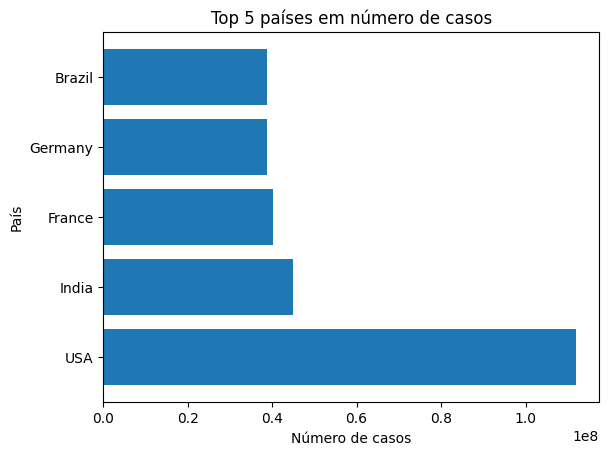

In [ ]:
# Plota o gráfico horizontal.
plt.barh(top5_casos['country'], top5_casos['Cases'])
# Título do gráfico.
plt.title('Top 5 países em número de casos')
# Títulos dos eixos x e y do gráfico.
plt.xlabel('Número de casos')
plt.ylabel('País')
# Exibe nosso gráfico.
plt.show()

## 2.2.2 Gráficos modelo "Pizza"
Para criar nossos gráficos, primeiro precisamos pensar o que vamos analisar. Como se trata de um dataset sobre a COVID 19, podemos começar nossa análise fazendo um gráfico para o número de casos, mortes, recuperações e testes em por continente.

In [ ]:
# Primeiro, precisamos filtrar os dados por continente. Isto é, separaremos o dataset original em partes a partir de cada continente.
europa_dados = dados.loc[dados['continent'] == 'Europe']
africa_dados = dados.loc[dados['continent'] == 'Africa']
america_sul_dados = dados.loc[dados['continent'] == 'South-America']
america_norte_dados = dados.loc[dados['continent'] == 'North-America']
asia_dados = dados.loc[dados['continent'] == 'Asia']
oceania_dados = dados.loc[dados['continent'] == 'Oceania']

# Como vamos criar gráficos, precisamos das listas de valores que usaremos para plotar os gráficos.
lista_numero_casos = []
lista_numero_mortes = []
lista_numero_recuperacoes = []
lista_numero_testes = []

# Como vamos somar a mesma coluna de cada continente, é interessante termos uma lista contendo todos os continentes pois usaremos um recurso da programação: o laço de iteração.
lista_continentes = [europa_dados, africa_dados, america_sul_dados, america_norte_dados, asia_dados, oceania_dados]

# Essa lista final servirá como rótulo para nossos gráficos.
lista_continentes_string = ['Europa', 'África', 'América do Sul', 'América do Norte', 'Ásia', 'Oceania']

# Para cada continente que está na nossa lista de continentes, somamos seu número de casos, mortes, recuperações e testes e adicionamos cada valor em sua lista respectiva.
for continente in lista_continentes:
  soma_numero_casos = continente['Cases'].sum()
  lista_numero_casos.append(soma_numero_casos)
  soma_numero_mortes = continente['Deaths'].sum()
  lista_numero_mortes.append(soma_numero_mortes)
  soma_numero_recuperacoes = continente['Recovered'].sum()
  lista_numero_recuperacoes.append(soma_numero_recuperacoes)
  soma_numero_testes = continente['Tests'].sum()
  lista_numero_testes.append(soma_numero_testes)

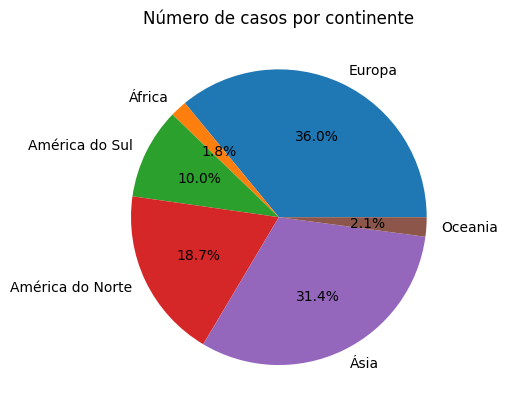

In [ ]:
# Plot do gráfico de número de casos por continente.
plt.pie(lista_numero_casos, labels=lista_continentes_string, autopct='%1.1f%%')
plt.title('Número de casos por continente')
plt.show()

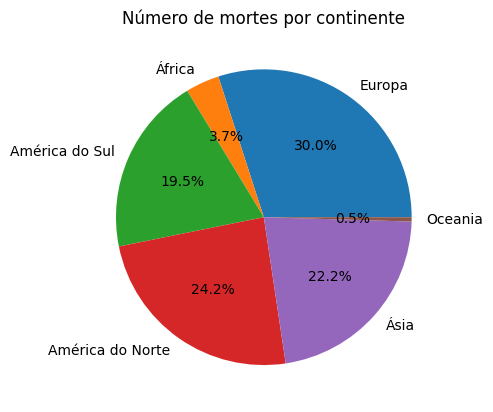

In [ ]:
# Plot do gráfico de número de mortes por continente.
plt.pie(lista_numero_mortes, labels=lista_continentes_string, autopct='%1.1f%%')
plt.title('Número de mortes por continente')
plt.show()

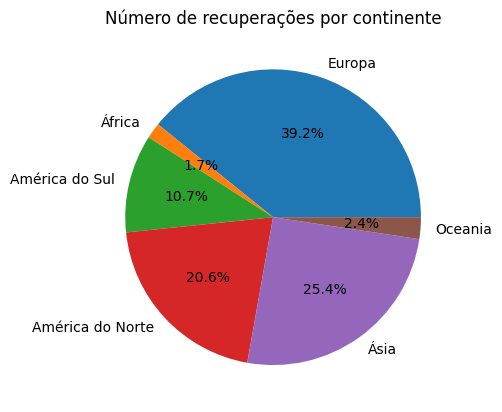

In [ ]:
# Plot do gráfico de número de recuperações por continente.
plt.pie(lista_numero_recuperacoes, labels=lista_continentes_string, autopct='%1.1f%%')
plt.title('Número de recuperações por continente')
plt.show()

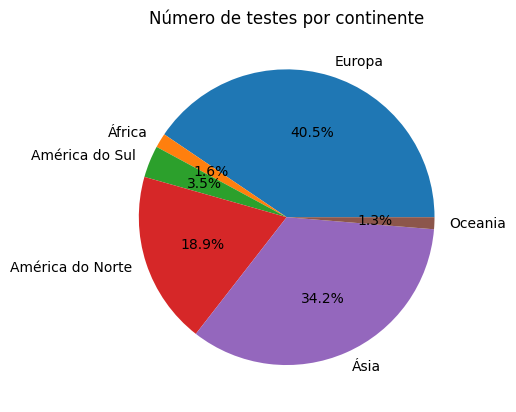

In [ ]:
# Plot do gráfico de número de testes por continente.
plt.pie(lista_numero_testes, labels=lista_continentes_string, autopct='%1.1f%%')
plt.title('Número de testes por continente')
plt.show()

## 2.2.3 Gráfico modelo "Barras Múltiplas"

Agora que plotamos os gráficos setorizados, temos uma boa noção do que o Dataset informa. Entretanto, pense comigo, não seria muito mais "esperto" ter um gráfico só que, de alguma forma, reuna todas as informações anteriormente?

Para isso, podemos usar um outro modelo de gráfico contendo múltiplas barras. Vamos ver como é o código?

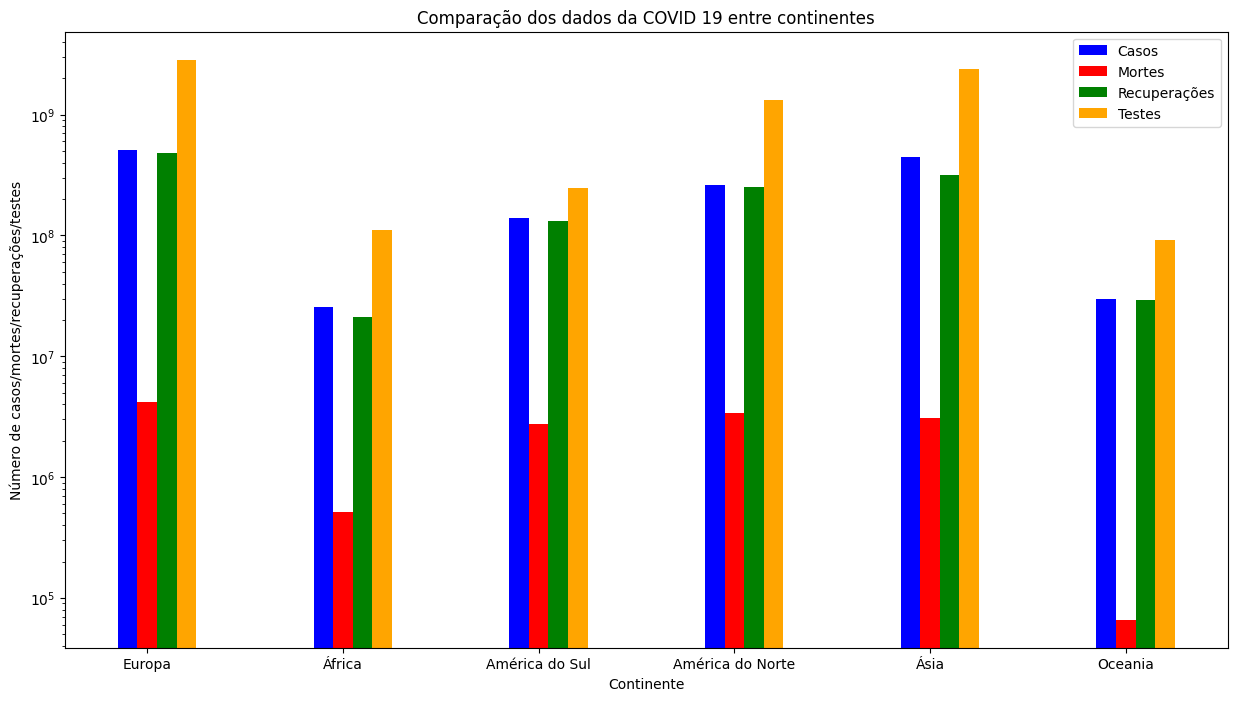

In [ ]:
# Primeiro, definimos o tamanho da nossa figura.
plt.figure(figsize=(15, 8))

# Depois o tamanho da barra.
tamanho_barra = 0.1

# Aqui definimos o espaçamento entre as barras.
r1 = np.arange(len(lista_numero_casos))
r2 = r1 + tamanho_barra
r3 = r2 + tamanho_barra
r4 = r3 + tamanho_barra

# Finalmente plotamos cada conjunto de barras.
plt.bar(r1, lista_numero_casos, color='blue', width=tamanho_barra, label='Casos')
plt.bar(r2, lista_numero_mortes, color='red', width=tamanho_barra, label='Mortes')
plt.bar(r3, lista_numero_recuperacoes, color='green', width=tamanho_barra, label='Recuperações')
plt.bar(r4, lista_numero_testes, color='orange', width=tamanho_barra, label='Testes')

# Rotulamos o eixo x.
plt.xlabel("Continente")
# Rotulamos o eixo y.
plt.ylabel("Número de casos/mortes/recuperações/testes")
# Rotulamos o gráfico.
plt.title("Comparação dos dados da COVID 19 entre continentes")
# Rotulamos cada agrupamento de barras.
plt.xticks([r + tamanho_barra for r in range(len(lista_continentes_string))], lista_continentes_string)
# Alteramos a escala para visualizar melhor o gráfico de mortes.
plt.yscale('log')
# Exibimos as legendas.
plt.legend()
# Exibimos o gráfico.
plt.show()

# 3. Conclusões

A partir dos gráficos construídos, devemos procurar explicações. Por exemplo, o que justifica a Europa ter um gráfico tão elevado de testes em comparação com a Ásia que tem uma população muito maior?


Se pensarmos um pouco, podemos buscar explicações. Uma delas poderia ser a falta de testes na população asiática. Pois se ela tem uma população bem maior e testou tanto quanto a Europa, natural pensarmos que não houve uma quantidade razoável de testes. E isso também justifica termos um número tão próximo de casos, afinal, sem testes não temos casos confirmados!


Ademais, neste Colab, exploramos dados utilizando Python, aproveitando bibliotecas poderosas como Pandas para manipulação e análise de dados, Matplotlib para visualizações gráficas e NumPy para cálculos numéricos. Demonstramos como carregar dados, limpar e preparar para análise, realizar visualizações informativas e extrair insights úteis, destacando a capacidade do Python como uma ferramenta eficaz para exploração e interpretação de conjuntos de dados.


Antes de terminar, vamos fazer uma reflexão! Você acha que as análises aqui estão suficientes para extraírmos muita informação ou faltou algo? Bom, vou te dar um spoiler... faltou sim.


Lembra na escola, quando o professor conta que devemos sempre visualizar dados ponderados? Isto é, uma coisa é termos 1 caso em uma população de 10 pessoas e outra coisa é 1 caso em uma população de 1 milhão. É exatamente isso! A título de simplificação, não trabalhamos aqui com dados ponderados. Entretanto, em uma análise mais robusta, é essencial visualizarmos de diferentes maneiras os dados ponderados e, não apenas, agrupados.


Por fim, podemos concluir que esse é o foco principal da Ciência de Dados: tratar, limpar e analisar dados e, dessas análises, extrair insights que possam ser valiosos. Esperamos que tenham gostado! ;)